<a href="https://colab.research.google.com/github/flash-berry/Data-Science-/blob/main/%D0%94%D0%971%D0%BF%D0%BEDS_%D0%98%D0%96%D0%A6%D0%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашняя работа №1**

Выполнил Пышный Артём Александрович

Доступ к датасету: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

In [ ]:
library(dplyr)
library(ggplot2)

**Текущий датасет содержит исчерпывающие знания о 2392 студентах для создания модели, способной предсказывать средний балл студента (GradeClass или GPA) по следующим признакам:**

StudentID : Уникальный идентификатор, присваиваемый каждому студенту (от 1001 до 3392).

Age: Возраст учащихся составляет от 15 до 18 лет.

Gender:  Пол учащихся, где 0 представляет мужской пол, а 1 представляет женский пол.

Ethnicity: этническая принадлежность студентов кодируется следующим образом:

  0: Кавказец

  1: Афроамериканец

  2: Азиатка

  3: Другое

ParentalEducation: уровень образования родителей, кодируется следующим образом:

0: Нет

1: Средняя школа

2: Немного колледжа

3: Бакалавр

4: Высшее

StudyTimeWeekly: еженедельное время обучения в часах, от 0 до 20.

Absence: количество пропусков в течение учебного года, от 0 до 30.

Tutoring: статус репетиторства, где 0 означает «Нет», а 1 означает «Да».

ParentalSupport: уровень родительской поддержки, кодируется следующим образом:

0: Нет

1: Низкий

2: Умеренный

3: Высокий

4: Очень высокий

Extracurricular: участие во внеклассных мероприятиях, где 0 означает «Нет», а 1 означает «Да».

Sports: Участие в спортивных состязаниях, где 0 означает «Нет», а 1 означает «Да».

Music: Участие в музыкальных мероприятиях, где 0 означает «Нет», а 1 означает «Да».

Volunteering: участие в волонтерской деятельности, где 0 означает «Нет», а 1 означает «Да».

GPA: средний балл по шкале от 0 до 4,0, на который влияют привычки в учебе, участие родителей и внеклассные мероприятия.

GradeClass: Классификация оценок студентов на основе среднего балла:

0: «отлично» (средний балл >= 3,5)

1: «B» (3,0 <= средний балл < 3,5)

2: «С» (2,5 <= средний балл < 3,0)

3: «D» (2,0 <= средний балл < 2,5)

4: «F» (средний балл < 2,0)

In [ ]:
data <- read.csv("/content/Student_performance_data _.csv", sep = ',')

In [ ]:
glimpse(data)

Rows: 2,392
Columns: 15
$ StudentID         <int> 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009…
$ Age               <int> 17, 18, 15, 17, 17, 18, 15, 15, 17, 16, 17, 17, 17, …
$ Gender            <int> 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1…
$ Ethnicity         <int> 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0…
$ ParentalEducation <int> 2, 1, 3, 3, 2, 1, 1, 4, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0…
$ StudyTimeWeekly   <dbl> 19.833723, 15.408756, 4.210570, 10.028829, 4.672495,…
$ Absences          <int> 7, 0, 26, 14, 17, 0, 10, 22, 1, 0, 11, 15, 21, 21, 9…
$ Tutoring          <int> 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1…
$ ParentalSupport   <int> 2, 1, 2, 3, 3, 1, 3, 1, 2, 3, 1, 2, 3, 4, 2, 0, 2, 2…
$ Extracurricular   <int> 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0…
$ Sports            <int> 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0…
$ Music             <int> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Volunteering  

In [ ]:
colnames(data)

[1] "StudentID"         "Age"               "Gender"           
 [4] "Ethnicity"         "ParentalEducation" "StudyTimeWeekly"  
 [7] "Absences"          "Tutoring"          "ParentalSupport"  
[10] "Extracurricular"   "Sports"            "Music"            
[13] "Volunteering"      "GPA"               "GradeClass"

In [ ]:
apply(data,2,class)

StudentID               Age            Gender         Ethnicity 
        "numeric"         "numeric"         "numeric"         "numeric" 
ParentalEducation   StudyTimeWeekly          Absences          Tutoring 
        "numeric"         "numeric"         "numeric"         "numeric" 
  ParentalSupport   Extracurricular            Sports             Music 
        "numeric"         "numeric"         "numeric"         "numeric" 
     Volunteering               GPA        GradeClass 
        "numeric"         "numeric"         "numeric"

Таргетный признак GradeClass нужно преобразовать из типа Numeric в тип Factor

In [ ]:
data <- data %>% mutate(GradeClass = as.factor(GradeClass))

In [ ]:
class(data$GradeClass)

[1] "factor"

Пердставим численное описание данных

In [ ]:
summary(data)

   StudentID         Age            Gender         Ethnicity     
 Min.   :1001   Min.   :15.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1599   1st Qu.:15.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :2196   Median :16.00   Median :1.0000   Median :0.0000  
 Mean   :2196   Mean   :16.47   Mean   :0.5109   Mean   :0.8775  
 3rd Qu.:2794   3rd Qu.:17.00   3rd Qu.:1.0000   3rd Qu.:2.0000  
 Max.   :3392   Max.   :18.00   Max.   :1.0000   Max.   :3.0000  
 ParentalEducation StudyTimeWeekly        Absences        Tutoring     
 Min.   :0.000     Min.   : 0.001057   Min.   : 0.00   Min.   :0.0000  
 1st Qu.:1.000     1st Qu.: 5.043079   1st Qu.: 7.00   1st Qu.:0.0000  
 Median :2.000     Median : 9.705363   Median :15.00   Median :0.0000  
 Mean   :1.746     Mean   : 9.771992   Mean   :14.54   Mean   :0.3014  
 3rd Qu.:2.000     3rd Qu.:14.408410   3rd Qu.:22.00   3rd Qu.:1.0000  
 Max.   :4.000     Max.   :19.978094   Max.   :29.00   Max.   :1.0000  
 ParentalSupport Extracurricular  

In [ ]:
summary(data$GradeClass)

0    1    2    3    4 
 107  269  391  414 1211

In [ ]:
data %>% summarise(mymean=mean(Absences), mymed=median(Absences), mymax=max(Absences), mymin=min(Absences))

mymean,mymed,mymax,mymin
<dbl>,<dbl>,<int>,<int>
14.54139,15,29,0


Построим график "ящик с усами" для признаков Absences и GradeClass

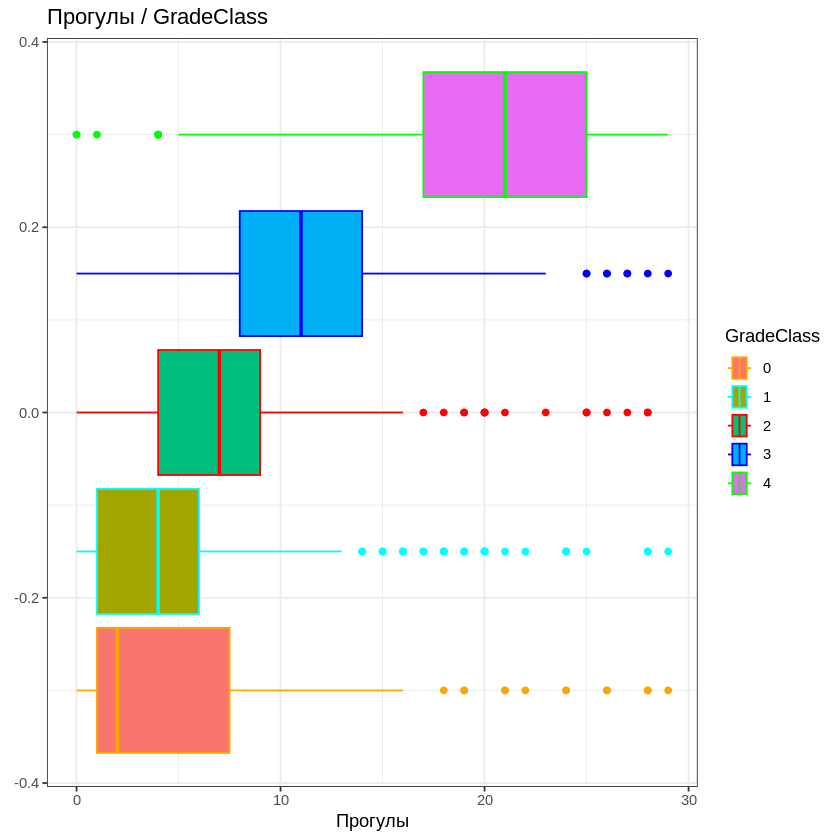

In [ ]:
ggplot(aes(x=Absences, col = GradeClass, fill = GradeClass), data=data) +
  geom_boxplot() +
  labs(title="Прогулы / GradeClass", x = "Прогулы") +
  scale_colour_manual(values=c("orange", "cyan", "red", "blue", "green"), aesthetics = c("colour")) +
  theme_bw()

**Выводы по графику:** присутствует связь между числом прогулов и средним баллом студента. Тенденция следующая: чем больше число прогулов, тем меньше средний балл. Притом существуют исключения из этой закономерности. Например есть 3 студента, которые при практически полном посещении всех занятий, всё равно имеют очень низкий средний балл. И также существует ряд студентов, которые при высоком проценте прогулов, всё равно получают высокий средний балл.

**Графическое представление основных переменных**

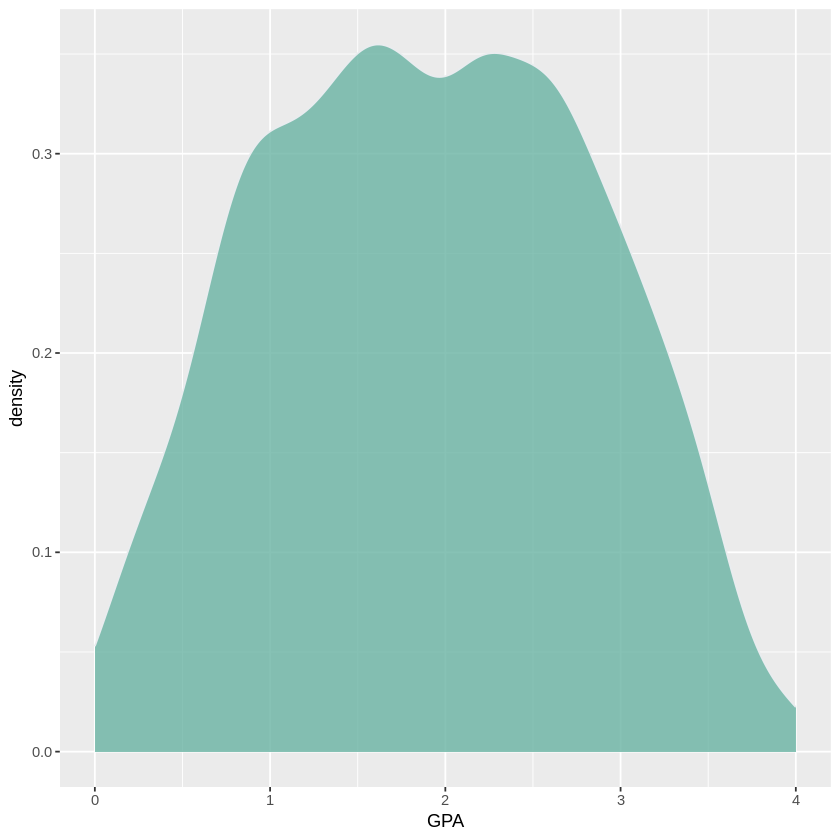

In [ ]:
data %>%
  ggplot( aes(x=GPA)) +
    geom_density(fill="#69b3a2", color="#e9ecef", alpha=0.8)

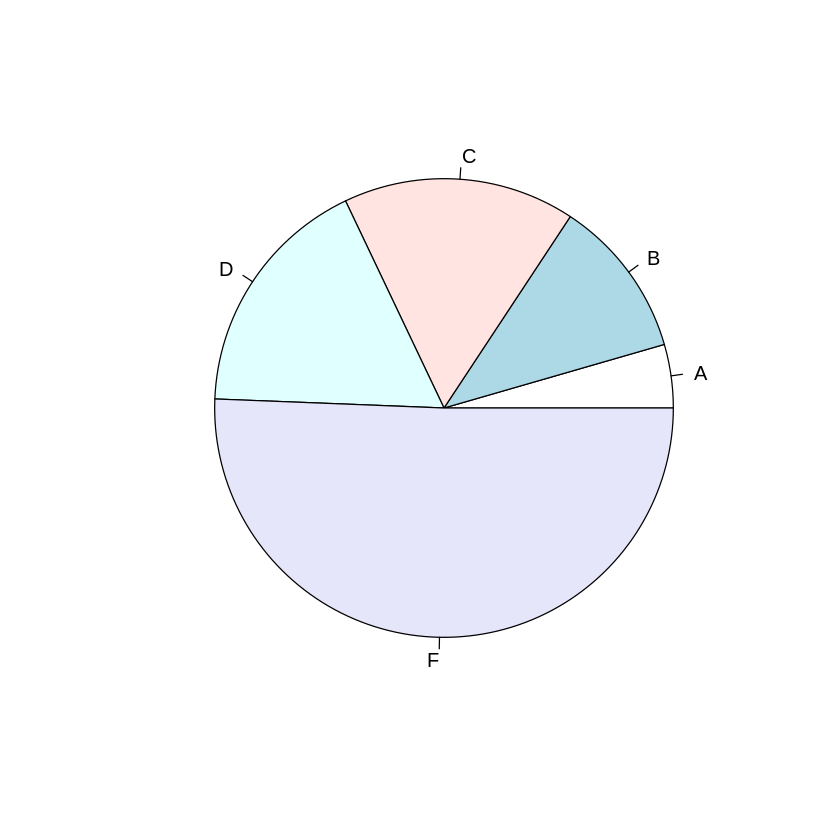

In [ ]:
grade_counts <- table(data$GradeClass)
pie(grade_counts, labels = c("A","B","C","D","F"))

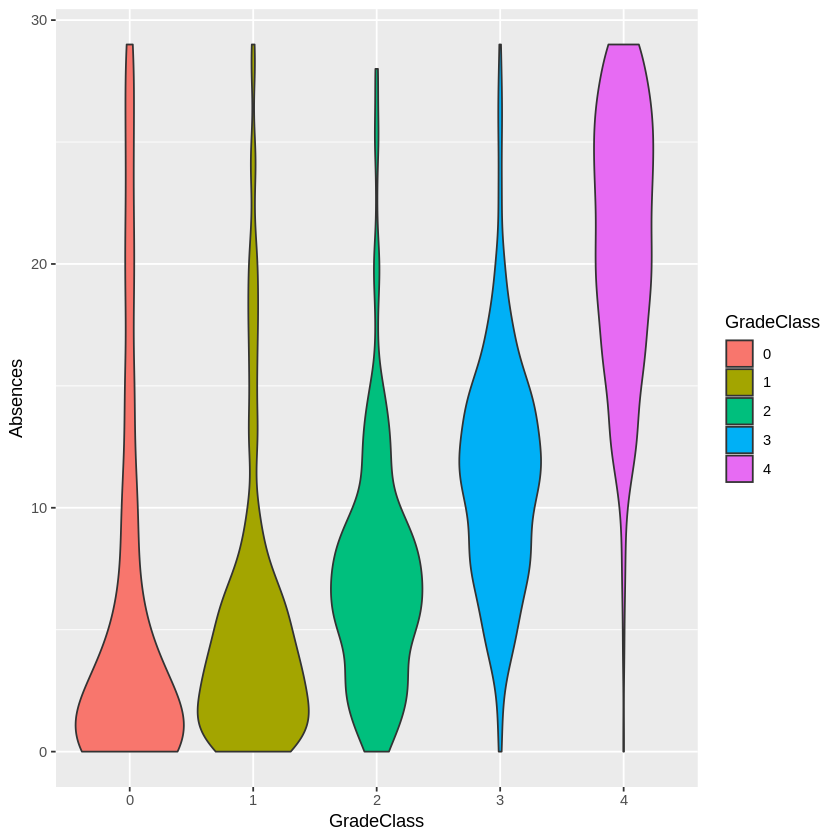

In [ ]:
ggplot(data, aes(x=GradeClass, y=Absences, fill=GradeClass)) +
  geom_violin()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


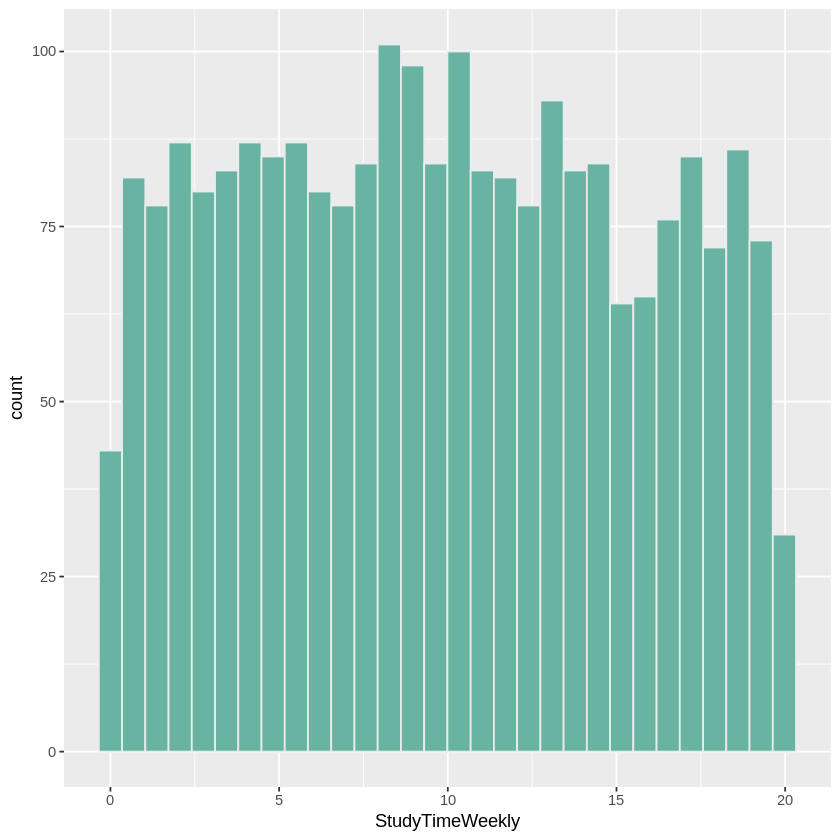

In [ ]:
ggplot(data, aes(x=StudyTimeWeekly)) +
  geom_histogram(fill="#69b3a2", color="#e9ecef")

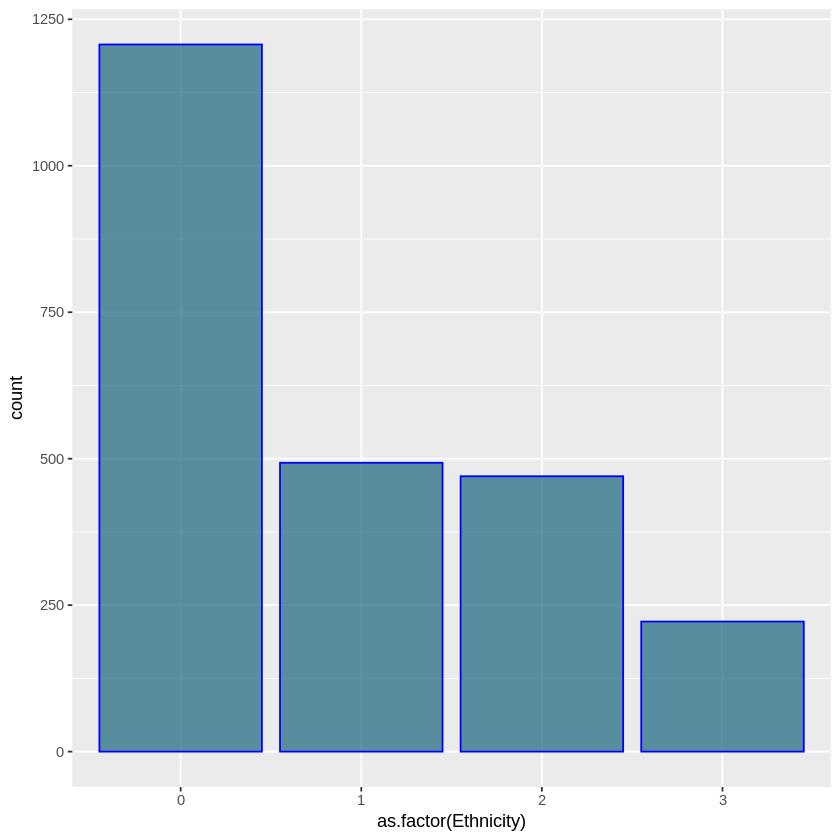

In [ ]:
ggplot(data, aes(x=as.factor(Ethnicity))) +
  geom_bar(color="blue", fill=rgb(0.1,0.4,0.5,0.7) )

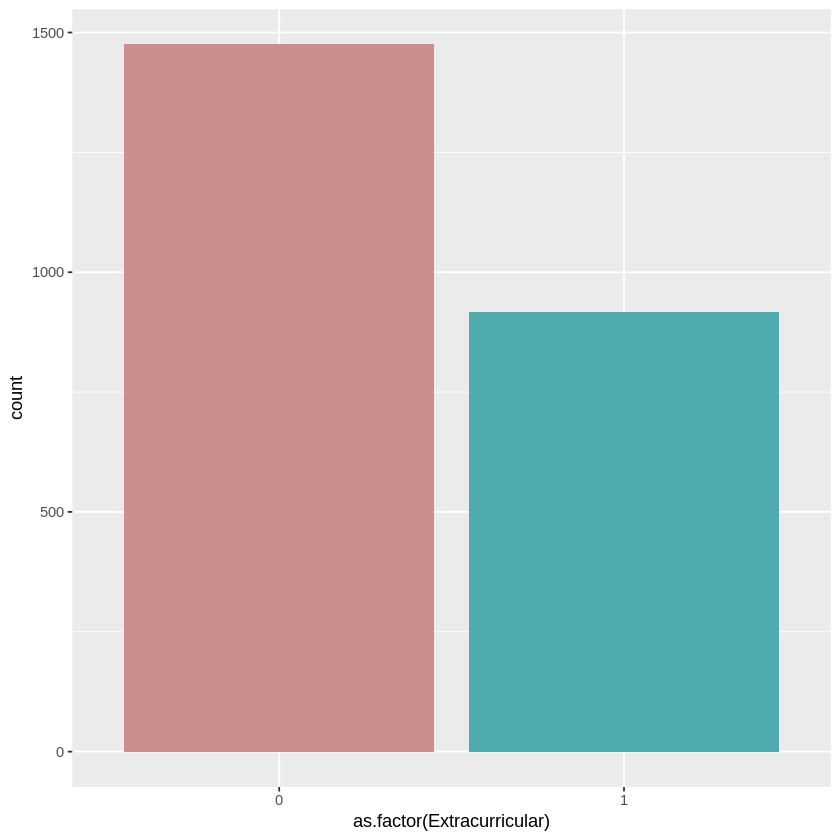

In [ ]:
ggplot(data, aes(x=as.factor(Extracurricular), fill=as.factor(Extracurricular) )) +
  geom_bar( ) +
  scale_fill_hue(c = 40) +
  theme(legend.position="none")

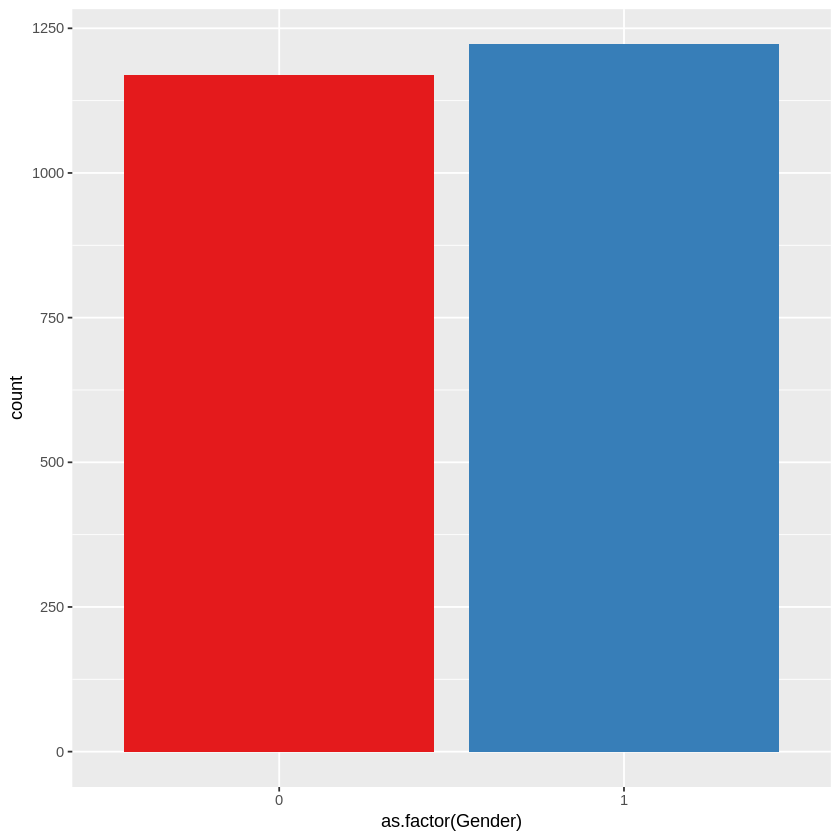

In [ ]:
ggplot(data, aes(x=as.factor(Gender), fill=as.factor(Gender) )) +
  geom_bar( ) +
  scale_fill_brewer(palette = "Set1") +
  theme(legend.position="none")

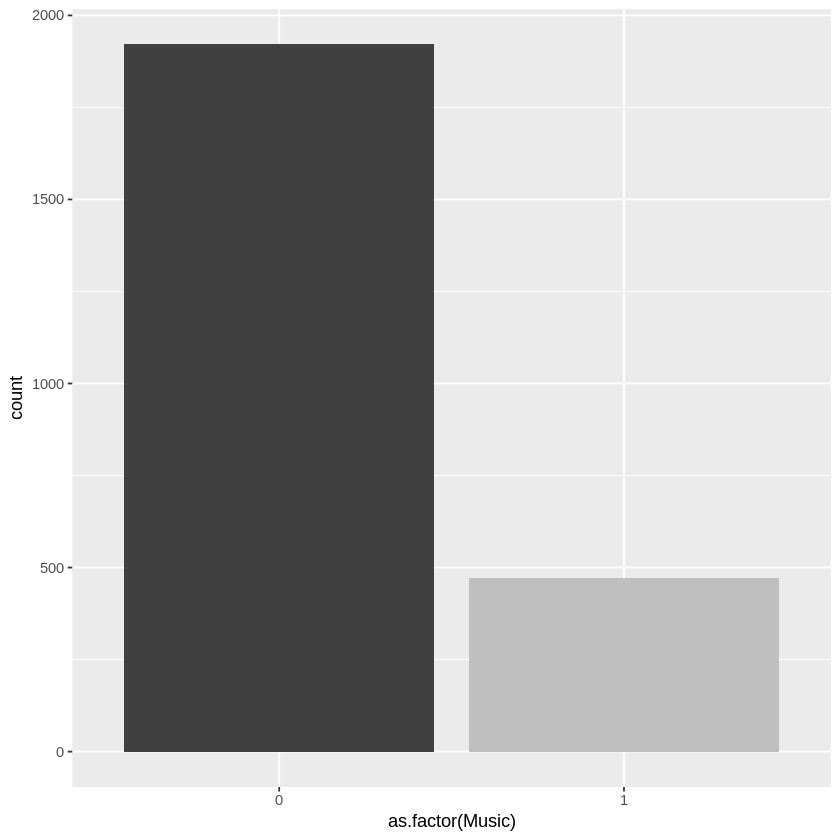

In [ ]:
ggplot(data, aes(x=as.factor(Music), fill=as.factor(Music) )) +
  geom_bar( ) +
  scale_fill_grey(start = 0.25, end = 0.75) +
  theme(legend.position="none")

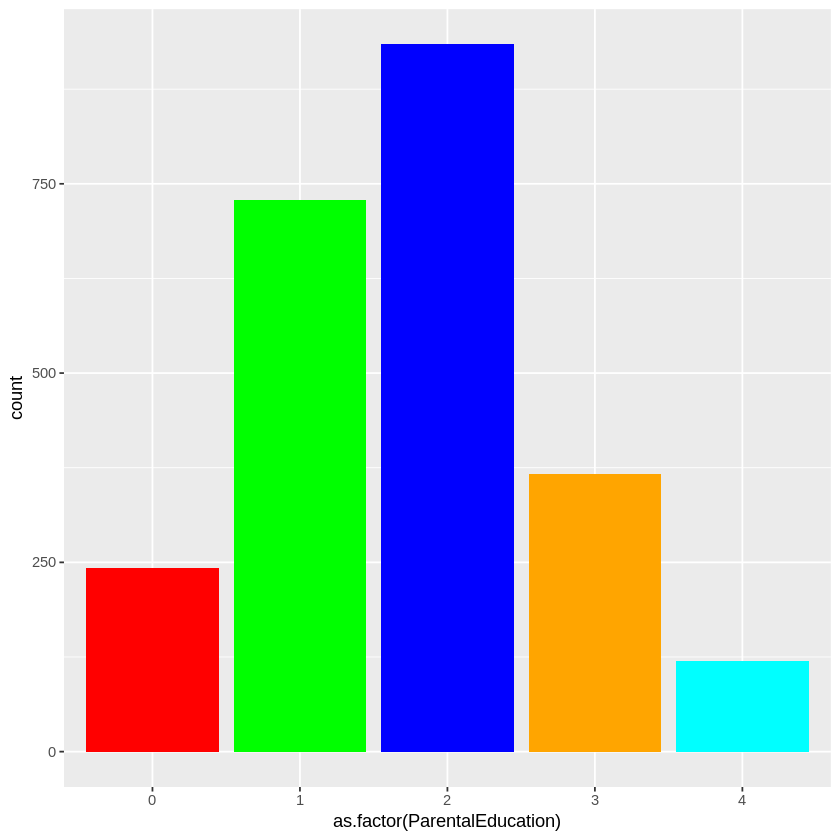

In [ ]:
ggplot(data, aes(x=as.factor(ParentalEducation), fill=as.factor(ParentalEducation) )) +
  geom_bar( ) +
  scale_fill_manual(values = c("red", "green", "blue", "orange", "cyan") ) +
  theme(legend.position="none")

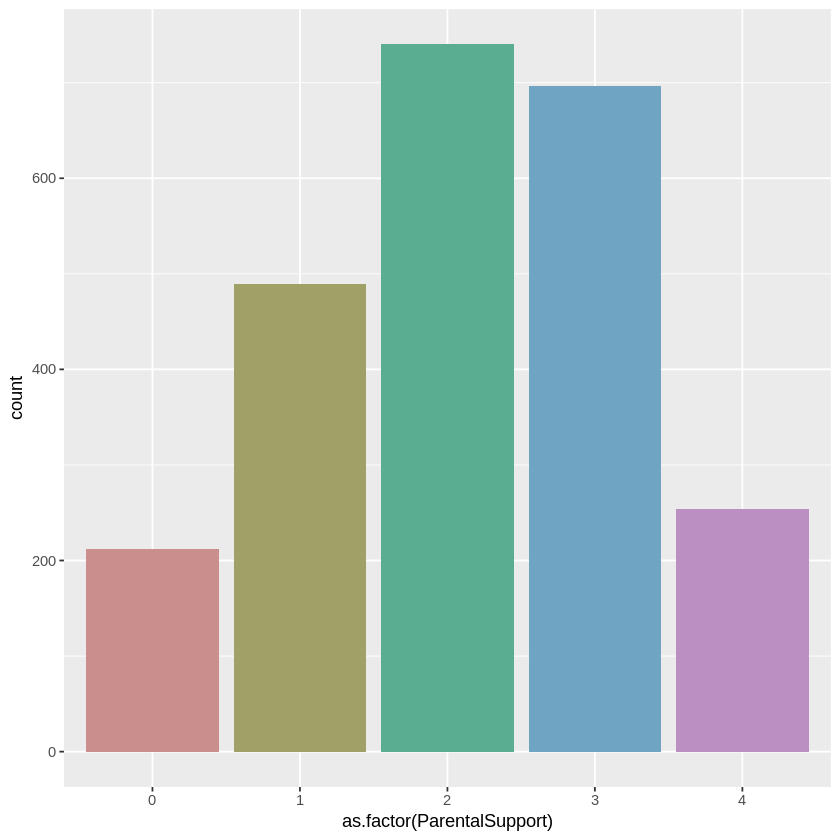

In [ ]:
ggplot(data, aes(x=as.factor(ParentalSupport), fill=as.factor(ParentalSupport) )) +
  geom_bar( ) +
  scale_fill_hue(c = 40) +
  theme(legend.position="none")

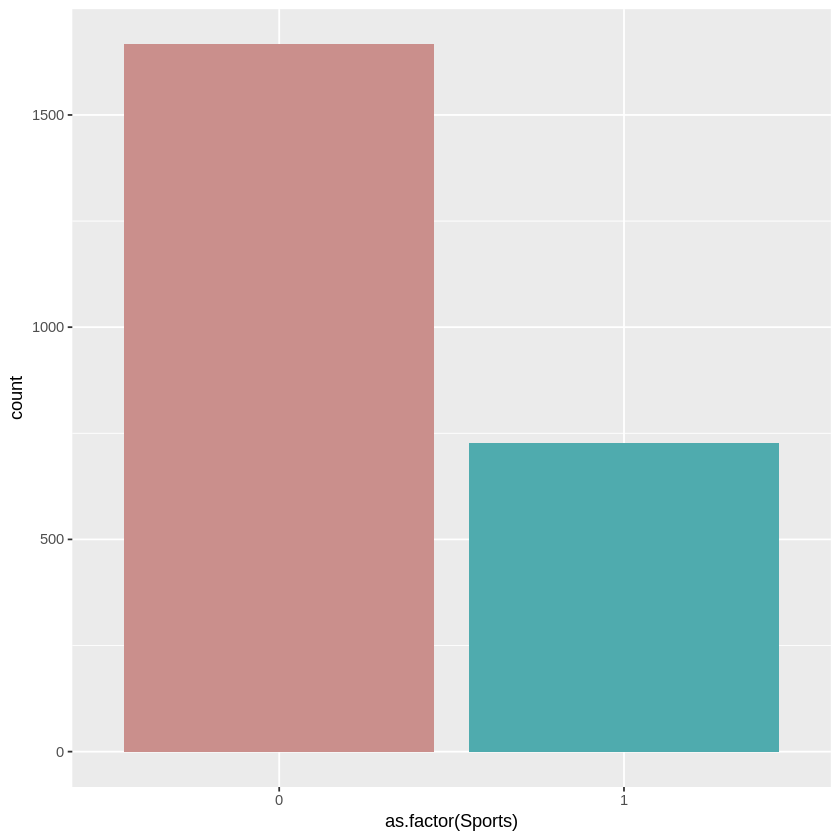

In [ ]:
ggplot(data, aes(x=as.factor(Sports), fill=as.factor(Sports) )) +
  geom_bar( ) +
  scale_fill_hue(c = 40) +
  theme(legend.position="none")

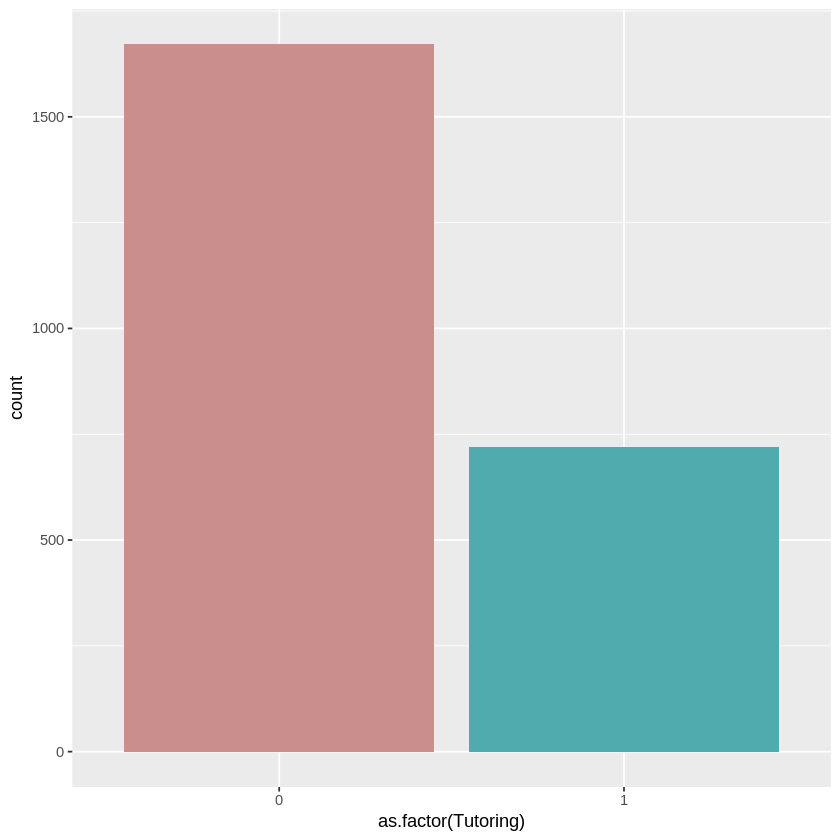

In [ ]:
ggplot(data, aes(x=as.factor(Tutoring), fill=as.factor(Tutoring) )) +
  geom_bar( ) +
  scale_fill_hue(c = 40) +
  theme(legend.position="none")

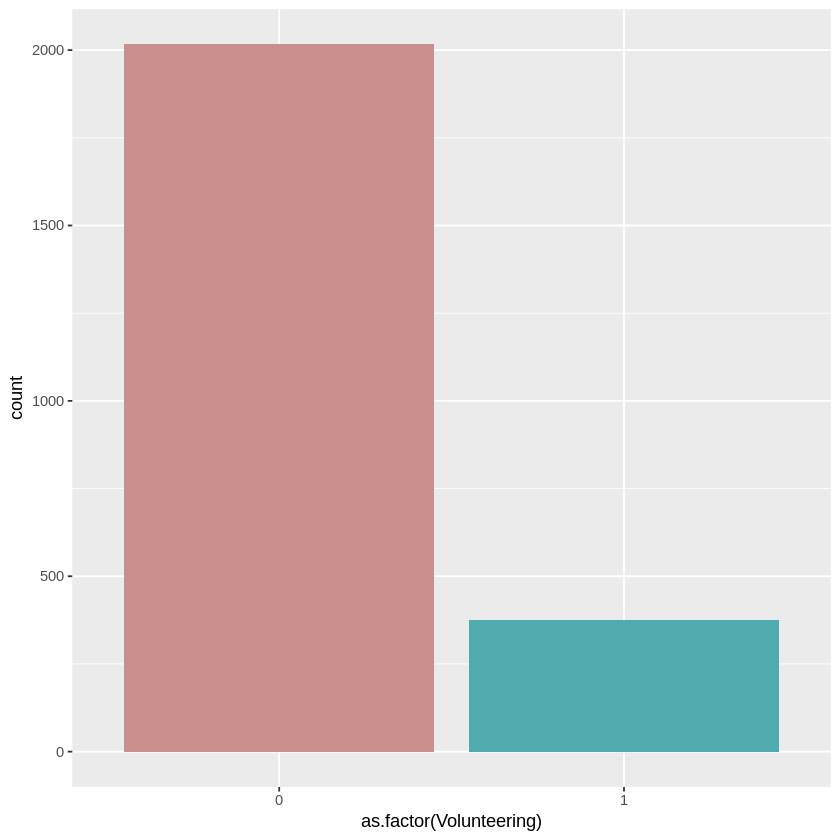

In [ ]:
ggplot(data, aes(x=as.factor(Volunteering), fill=as.factor(Volunteering) )) +
  geom_bar( ) +
  scale_fill_hue(c = 40) +
  theme(legend.position="none")